### Importing the required packages

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

### Creating train and validation data generator

In [73]:
import os

l=os.listdir("D:\Machine Learning Projects\Bean leaves disease classifier\Train")
l

['angular_leaf_spot', 'bean_rust', 'healthy']

In [45]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                  rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train = train_datagen.flow_from_directory(directory = "D:\Machine Learning Projects\Bean leaves disease classifier\Train",
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         target_size=(224,224))

Found 1034 images belonging to 3 classes.


In [23]:
y_train = train.labels

In [46]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.,
                                       rotation_range = 40,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)
validation = validation_datagen.flow_from_directory(directory = "D:\Machine Learning Projects\Bean leaves disease classifier\Validation",
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         target_size=(224,224))

Found 133 images belonging to 3 classes.


### Transfer Learning

In [58]:
model = MobileNetV2()
for layers in model.layers:
    layers.trainable = False                           #Freezing the model parameters from trainings

In [6]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [59]:
baseinput = model.layers[0].input
print(baseinput)
baseoutput = model.layers[-2].output

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")


In [60]:
finaloutput = tf.keras.layers.Dense(128)(baseoutput)
finaloutput = tf.keras.layers.Activation('relu')(finaloutput)
finaloutput = tf.keras.layers.Dense(64)(baseoutput)
finaloutput = tf.keras.layers.Activation('relu')(finaloutput)
finaloutput = tf.keras.layers.Dense(3,activation='softmax')(finaloutput)

In [61]:
new_model = tf.keras.Model(inputs=baseinput, outputs=finaloutput)
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [70]:
new_model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy", metrics=['accuracy'])

In [56]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(eslf, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            self.model.stop_training=True

In [72]:
callback = Callback()
history = new_model.fit(train, epochs=25, validation_data=validation,callbacks=[callback])

Epoch 1/25
33/33 [==============================] - 54s 2s/step - loss: 0.6946 - accuracy: 0.6973 - val_loss: 0.4693 - val_accuracy: 0.7895
Epoch 2/25
33/33 [==============================] - 52s 2s/step - loss: 0.4740 - accuracy: 0.7901 - val_loss: 0.4700 - val_accuracy: 0.8421
Epoch 3/25
33/33 [==============================] - 44s 1s/step - loss: 0.4702 - accuracy: 0.7998 - val_loss: 0.3714 - val_accuracy: 0.8346
Epoch 4/25
33/33 [==============================] - 43s 1s/step - loss: 0.3554 - accuracy: 0.8462 - val_loss: 0.2963 - val_accuracy: 0.8872
Epoch 5/25
33/33 [==============================] - 40s 1s/step - loss: 0.3951 - accuracy: 0.8414 - val_loss: 0.2267 - val_accuracy: 0.9323
Epoch 6/25
33/33 [==============================] - 40s 1s/step - loss: 0.3707 - accuracy: 0.8569 - val_loss: 0.2552 - val_accuracy: 0.8797
Epoch 7/25
33/33 [==============================] - 42s 1s/step - loss: 0.3106 - accuracy: 0.8704 - val_loss: 0.2257 - val_accuracy: 0.9098
Epoch 8/25
33/33 [==

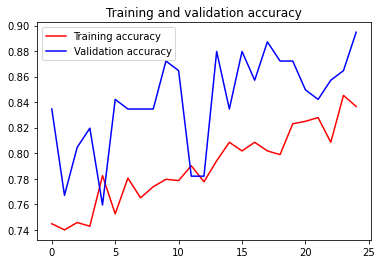

<Figure size 432x288 with 0 Axes>

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()